In [1]:
#Import Libraries 
import lazy_pipeline as lpipe
import scipy.spatial
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.10.2
1.4.1
1.1.3


In [3]:
#importing Data set
df = lpipe.load_data('forest_fires')
print(df.shape)
df.head()


(244, 14)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,False
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,False
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,False
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,False
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,False


In [4]:
df.iloc[121:125,:]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,False
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,False
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,False
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,False


In [5]:
#Placing 0 and 1 for regions
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [6]:
#columns
df.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
#Dropping year column
df1=df.drop(['year'],axis=1)
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,False,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,False,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,False,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,False,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,True,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,False,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,False,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,False,1.0


In [8]:
#Information about columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    object 
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    object 
 12  Classes      243 non-null    object 
 13  Region       244 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 26.8+ KB


In [9]:
#checking for null values and removing rows
df1.isnull().sum()
df1.dropna(inplace=True)



In [10]:
df1.isnull().sum()


day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
#Binarizing the data so tha data is of similar type
y_name = 'Classes'
y = df1[y_name]
X = lpipe.binarize_X(df1.drop(y_name, axis=1))
print('y_shape: ', y.shape)
print('X_shape: ', X.shape)
X.head


y_shape:  (243,)
X_shape:  (243, 1115)


<bound method NDFrame.head of      day: 1  day: 2  day: 3  day: 4  day: 5  day: 6  day: 7  day: 8  day: 9  \
0      True   False   False   False   False   False   False   False   False   
1     False    True   False   False   False   False   False   False   False   
2     False   False    True   False   False   False   False   False   False   
3     False   False   False    True   False   False   False   False   False   
4     False   False   False   False    True   False   False   False   False   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
239   False   False   False   False   False   False   False   False   False   
240   False   False   False   False   False   False   False   False   False   
241   False   False   False   False   False   False   False   False   False   
242   False   False   False   False   False   False   False   False   False   
243   False   False   False   False   False   False   False   False   False   

     day: 10  ...  FW

In [12]:
#skipped the step for shuffling as we have date as column
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]


{'BUI: 3.4',
 'DC: 7.6',
 'DMC: 3.4',
 'FFMC: 65.7',
 'FWI: 0.5',
 'ISI: 1.3',
 'RH: 57',
 'Rain: 0.0',
 'Region: 0.0',
 'Temperature: 29',
 'Ws: 18',
 'day: 1',
 'month: 6'}

In [13]:
# splitting the dataset to train and test data as 90 and 10 percent 
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
print('n_train: ', n_train)
print('n_test: ', n_test)
print(n_train)

n_train:  24
n_test:  219
24


In [14]:
#predecting the data 
%%time
gen = lpipe.predict_array(X_bin, y.values.tolist(), n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)


Predicting step by step: 100%|██████████████████████████████████████████████████████| 243/243 [00:00<00:00, 557.16it/s]

CPU times: total: 422 ms
Wall time: 398 ms


In [15]:
%%time
gen = list(lpipe.predict_array(X_bin, y.values.tolist(), n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|████████████████████████████████████████████████████| 243/243 [00:00<00:00, 13663.85it/s]

CPU times: total: 31.2 ms
Wall time: 19.1 ms


In [16]:
y.isnull().sum()

0

In [17]:
y_test = y[n_train:]
y_test.isnull().sum()

0

In [18]:
#changing the elements of test data to boolean type
test = y[n_train:].tolist()
y_test = []
for x in test:
    y_test.append(bool(x))

In [19]:
#calculating the accuracy score and f1 score 
from sklearn.metrics import accuracy_score, f1_score
score_vals = {}
for score_f in [accuracy_score, f1_score]:
 score_name = score_f.__name__
 preds = y_preds
 score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
 
 score_name = score_f.__name__ + '_fixedtrain'
 preds = y_preds_fixedtrain
 score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
print ("Accuracy : ", accuracy_score(y_test,y_preds)*100)
print("F1-score: ", f1_score(y_test, y_preds) * 100)

Accuracy :  81.7351598173516
F1-score:  86.01398601398603


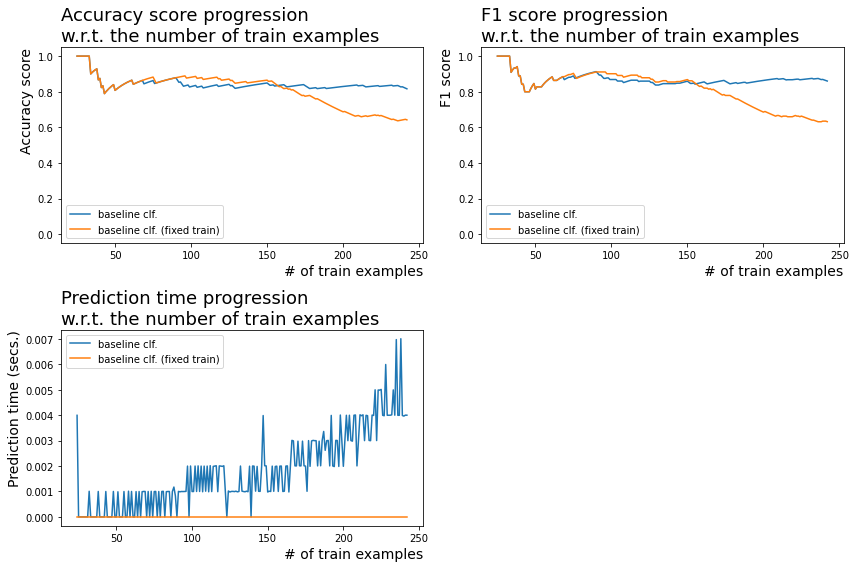

In [20]:
#Plotting the graph 
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1) # Replace default "transparent" background of the figure with the "white" one
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
 ax.set_ylim(0-0.05, 1+0.05)
 ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
 ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
 
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')
# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score','Prediction time'], ['','','(secs.)']):
 ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
 ax.set_xlabel('# of train examples', loc='right', size=14)
 ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
 ax.legend()
 
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off() 
# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('Classifier_comparison.png')
plt.show()


# Comparing our algorithm with other rule based models

# Decision Tree Comparison

In [23]:
# Function to perform training with giniIndex(inbuilt functionality of descision tree)
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
  
# Driver code
def main():
      
    df = lpipe.load_data('balancing-data')
    X, Y, X_train, X_test, y_train, y_test = lpipe.splitdataset(df)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    print("Results Using Gini Index:")
      
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
if __name__=="__main__":
    main()

Results Using Gini Index:
Accuracy :  68.25396825396825
Results Using Entropy:
Accuracy :  68.25396825396825


# XGBoost  

In [27]:
from xgboost import XGBClassifier
from sklearn.datasets import load_wine

In [28]:
X, y = load_wine(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [29]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


C:\Users\91875\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [30]:
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [32]:
y_pred = model.predict(X_test)


1.0

In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0